## Gaussian Processes (GP) with GPy

We will use GPy library for GP modeling [SheffieldML github page](https://github.com/SheffieldML/GPy).

Why **GPy**?

* Specialized library of GP models (regression, classification, GPLVM)
* Variety of covariance functions is implemented
* There are GP models for large-scale problems
* Easy to use

Uncomment and run the following line to install GPy library

In [ ]:
!pip install GPy

In [1]:
%matplotlib notebook

from __future__ import print_function

import numpy as np
from matplotlib import pyplot
import GPy

Current documentation of GPy library can be found [here](http://gpy.readthedocs.org/en/latest/).

## Gaussian Process Regression

A data set $\left (X, \mathbf{y} \right ) = \left \{ (x_i, y_i), x_i \in \mathbb{R}^d, y_i \in \mathbb{R} \right \}_{i = 1}^N$ is given.  

Assumption:
$$
y = f(x) + \varepsilon,
$$
where $f(x)$ is a Gaussian Processes and $\varepsilon \sim \mathcal{N}(0, \sigma_n^2)$ is a Gaussian noise .

Posterior distribution
$$
y_* | X, \mathbf{y}, x_* \sim \mathcal{N}(m(x_*), \sigma(x_*)),
$$
with predictive mean and variance given by
$$
m(x_*) = \mathbf{k}^T \mathbf{K}_y^{-1} \mathbf{y} = \sum_{i = 1}^N \alpha_i k(x_*, x_i),
$$
$$
\sigma^2(x_*) = k(x_*, x_*) - \mathbf{k}^T\mathbf{K}_y^{-1}\mathbf{k},
$$
where
$$
\mathbf{k} = \left ( k(x_*, x_1), \ldots, k(x_*, x_N) \right )^T
$$
$$
\mathbf{K}_y = \|k(x_i, x_j)\|_{i, j = 1}^N + \sigma_n^2 \mathbf{I}
$$

## Building GPR model

Lets fit GPR model for function $f(x) = − \cos(\pi x) + \sin(4\pi x)$ in $[0, 1]$,
with noise $y(x) = f(x) + \epsilon$, $\epsilon \sim \mathcal{N}(0, 0.1)$. 

<IPython.core.display.Javascript object>


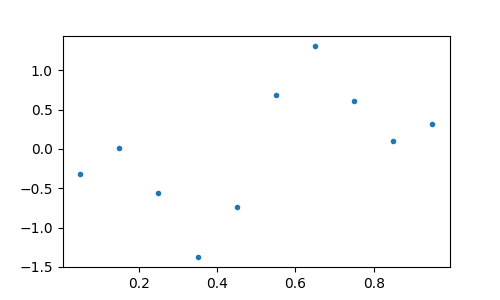

In [2]:
N = 10
X = np.linspace(0.05, 0.95, N).reshape(-1, 1)
Y = -np.cos(np.pi * X) + np.sin(4 * np.pi * X) + \
    np.random.normal(loc=0.0, scale=0.1, size=(N, 1))
pyplot.figure(figsize=(5, 3))
pyplot.plot(X, Y, '.')

#### 1. Define covariance function

The most popular kernel - RBF kernel - has 2 parameters: `variance` and `lengthscale`, $k(x, y) = \sigma^2 \exp\left ( -\dfrac{\|x - y\|^2}{2l^2}\right )$,
where `variance` is $\sigma^2$, and `lengthscale` - $l$.

In [3]:
input_dim = 1
variance = 1
lengthscale = 0.2
kernel = GPy.kern.RBF(input_dim, variance=variance,
                      lengthscale=lengthscale)

#### 2. Create GPR model


Name : GP regression
Objective : 13.046593749829281
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    0.2  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


<IPython.core.display.Javascript object>


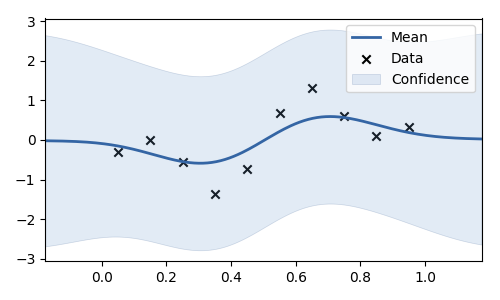

In [4]:
model = GPy.models.GPRegression(X, Y, kernel)
print(model)
model.plot(figsize=(5, 3))

### Parameters of the covariance function

Values of parameters of covariance function can be set like:  `k.lengthscale = 0.1`.

Let's change the value of `lengthscale` parameter and see how it changes the covariance function.

<IPython.core.display.Javascript object>


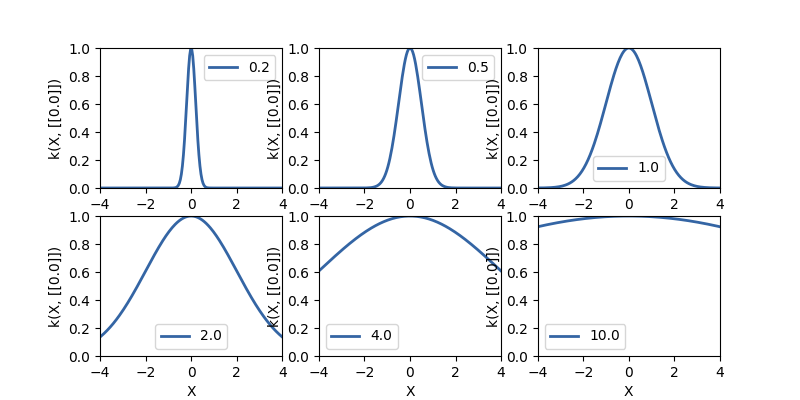

In [5]:
k = GPy.kern.RBF(1)
theta = np.asarray([0.2, 0.5, 1, 2, 4, 10])
figure, axes = pyplot.subplots(2, 3, figsize=(8, 4))
for t, ax in zip(theta, axes.ravel()):
    k.lengthscale = t
    k.plot(ax=ax)
    ax.set_ylim([0, 1])
    ax.set_xlim([-4, 4])
    ax.legend([t])

### Task
Try to change parameters to obtain more accurate mdoel.


Name : GP regression
Objective : 13.322964896906587
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    0.1  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


<IPython.core.display.Javascript object>


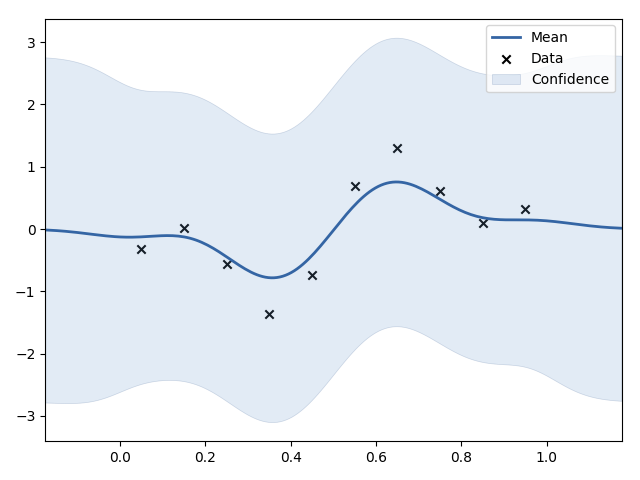

In [6]:
######## Your code here ########
kernel = GPy.kern.RBF(1, lengthscale=0.1)
model = GPy.models.GPRegression(X, Y, kernel)

print(model)
model.plot()

### Tuning parameters of covariance function

The parameters are tuned by maximizing likelihood. To do it just use `optimize()` method of the model.


Name : GP regression
Objective : 5.201068697879989
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  rbf.variance             |    0.679009809201  |      +ve      |        
  rbf.lengthscale          |    0.136195863395  |      +ve      |        
  Gaussian_noise.variance  |  5.9702672916e-09  |      +ve      |        


<IPython.core.display.Javascript object>


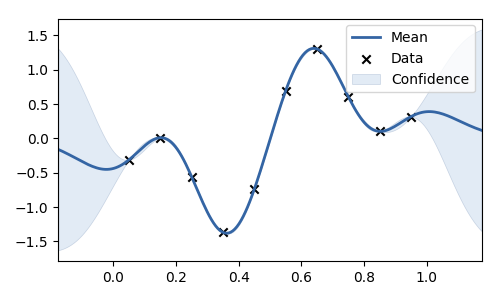

In [7]:
model.optimize()
print(model)
model.plot(figsize=(5, 3))

*Note*: `optimize()` maximizes likelihood.  However, for GP there is an expression for LOO predictive mean and variance
$$
\mu_i = y_i - \frac{ \left [ \mathbf{K}^{-1}\mathbf{y} \right ]_i }{\left [ \mathbf{K}^{-1} \right ]_{ii}},
$$
$$
\sigma_i = \frac{1}{\mathbf{K}^{-1}_{ii}}
$$
Then, e.g. MSE-LOO
$$
{\rm MSE-LOO} = \frac{1}{N}\sum_{i = 1}^N \left (\frac{\mathbf{K}^{-1}\mathbf{y}}{\mathbf{K}^{-1}_{ii}} \right )^2
$$

### Noise variance

Noise variance acts like a regularization in GP models. Larger values of noise variance lead to more smooth model.  
Let's check it: try to change noise variance to some large value, to some small value and see the results.

Noise variance accessed like this: `model.Gaussian_noise.variance = 1`

<IPython.core.display.Javascript object>


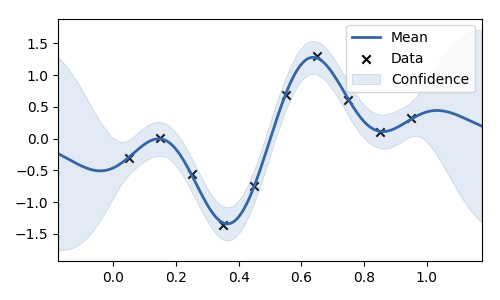

In [9]:
######## Your code here ########
model.Gaussian_noise.variance = 0.01
model.plot(figsize=(5, 3))

Now, let's generate more noisy data and try to fit model.


Name : GP regression
Objective : 35.50340187117026
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |            value  |  constraints  |  priors
  rbf.variance             |   0.914650081662  |      +ve      |        
  rbf.lengthscale          |  0.0946992577029  |      +ve      |        
  Gaussian_noise.variance  |   0.178281850823  |      +ve      |        


<IPython.core.display.Javascript object>


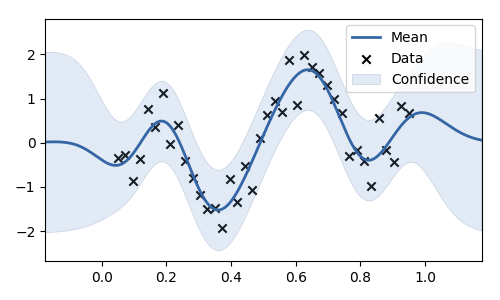

In [10]:
N = 40
X = np.linspace(0.05, 0.95, N).reshape(-1, 1)
Y = -np.cos(np.pi * X) + np.sin(4 * np.pi * X) + \
    np.random.normal(loc=0.0, scale=0.5, size=(N, 1))

kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()
print(model)
model.plot(figsize=(5, 3))

Now, let's fix noise variance to some small value and fit the model

<IPython.core.display.Javascript object>


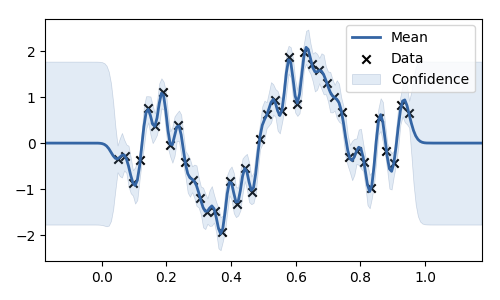

In [11]:
kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(X, Y, kernel)
model.Gaussian_noise.variance.fix(0.01)
model.optimize()
model.plot(figsize=(5, 3))

# Gaussian Process Classification

### Classification

A data set $\left (X, \mathbf{y} \right ) = \left \{ (x_i, y_i), x_i \in \mathbb{R}^d, y_i \in \{+1, -1\} \right \}_{i = 1}^N$ is given.  

Assumption:
$$
p(y = +1 \; | \; x) = \sigma(f(x)) = \pi(x),
$$
where latent function $f(x)$ is a Gaussian Processes.

We need to produce a probabilistic prediction
$$
\pi_* = p(y_* \; | \; X, \mathbf{y}, x_*) = \int \sigma(f_*) p(f_* \; | \; X, \mathbf{y}, x_*) df_*,
$$
$$
p(f_* \; | \; X, \mathbf{y}, x_*) = \int p(f_* \; | \; X, x_*, \mathbf{f}) p(\mathbf{f} \; | \; X, \mathbf{y}) d\mathbf{f},
$$
where $p(\mathbf{f} \; |\; X, \mathbf{y}) = \dfrac{p(\mathbf{y} | X, \mathbf{f}) p(\mathbf{f} | X)}{p(\mathbf{y} | X)}$ is the posterior over the latent variables.

Both integrals are intractable.

Use approximation technique like Laplace approximation or Expectation Propagation.

<IPython.core.display.Javascript object>


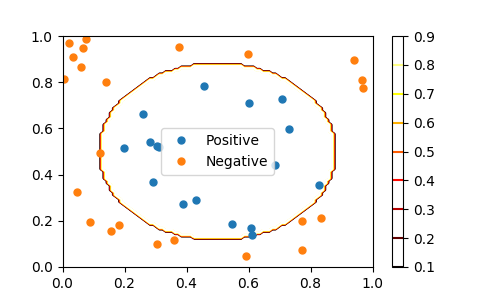

In [12]:
from matplotlib import cm

def cylinder(x):
    y = (1 / 7.0 - (x[:, 0] - 0.5)**2 - (x[:, 1] - 0.5)**2) > 0
    return y

np.random.seed(42)
X = np.random.rand(40, 2)
y = cylinder(X)

x_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
y_grid = cylinder(np.hstack((x_grid[0].reshape(-1, 1), x_grid[1].reshape(-1, 1)))).reshape(x_grid[0].shape)

positive_idx = y == 1
pyplot.figure(figsize=(5, 3))
pyplot.plot(X[positive_idx, 0], X[positive_idx, 1], '.', markersize=10, label='Positive')
pyplot.plot(X[~positive_idx, 0], X[~positive_idx, 1], '.', markersize=10, label='Negative')
im = pyplot.contour(x_grid[0], x_grid[1], y_grid, 10, cmap=cm.hot)
pyplot.colorbar(im)
pyplot.legend()
pyplot.show()


Name : gp_classification
Objective : 18.804605171659013
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  gp_classification.  |          value  |  constraints  |  priors
  rbf.variance        |  5.46880383079  |      +ve      |        
  rbf.lengthscale     |           (2,)  |      +ve      |        


<IPython.core.display.Javascript object>


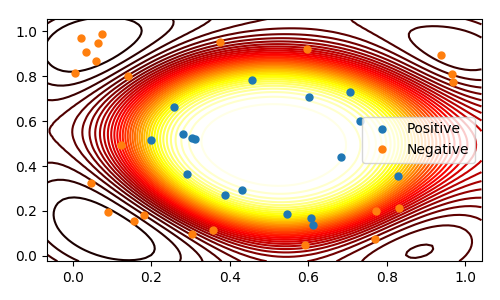

In [13]:
kernel = GPy.kern.RBF(2, variance=1., lengthscale=0.2, ARD=True)

model = GPy.models.GPClassification(X, y.reshape(-1, 1), kernel=kernel)
model.optimize()
print(model)


def plot_model_2d(model):

    model.plot(levels=40, resolution=80, plot_data=False, figsize=(5, 3))
    pyplot.plot(X[positive_idx, 0], X[positive_idx, 1], '.', markersize=10, label='Positive')
    pyplot.plot(X[~positive_idx, 0], X[~positive_idx, 1], '.', markersize=10, label='Negative')
    pyplot.legend()
    pyplot.show()
    
plot_model_2d(model)

Let's change lengthscale to some small value

<IPython.core.display.Javascript object>


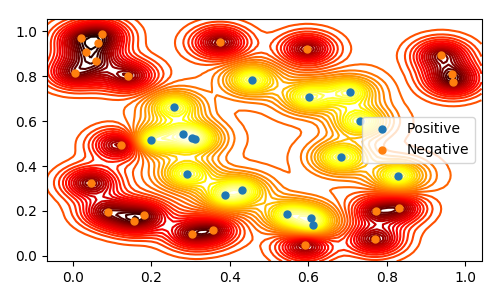

In [14]:
model.rbf.lengthscale = [0.05, 0.05]
plot_model_2d(model)

### Covariance functions

Short info about covariance function can be printed using `print(k)`. 

In [15]:
k = GPy.kern.RBF(1)
print(k)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        


You can plot the covariance function using `plot()` method.

<IPython.core.display.Javascript object>


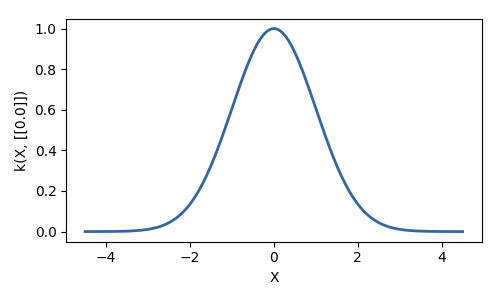

In [16]:
k.plot(figsize=(5, 3))

### Heaviside function

The most popular covariance function is RBF. However, not all the functions can be modelled using RBF covariance function. For example, approximations of functions with large gradients or discontinuities will suffer from oscillations.

<IPython.core.display.Javascript object>


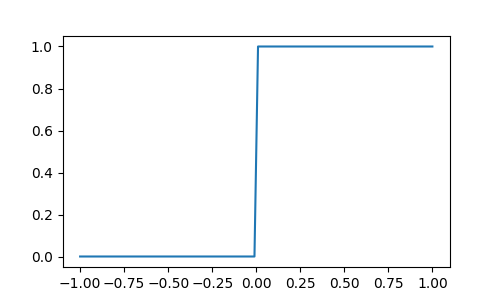

In [17]:
def heaviside(x):
    return np.asfarray(x > 0)

x = np.linspace(-1, 1, 100)
y = heaviside(x)
pyplot.figure(figsize=(5, 3))
pyplot.plot(x, y)


Name : GP regression
Objective : -16.673639020830432
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  rbf.variance             |    0.329609141254  |      +ve      |        
  rbf.lengthscale          |    0.158111386795  |      +ve      |        
  Gaussian_noise.variance  |  0.00177733412942  |      +ve      |        


<IPython.core.display.Javascript object>


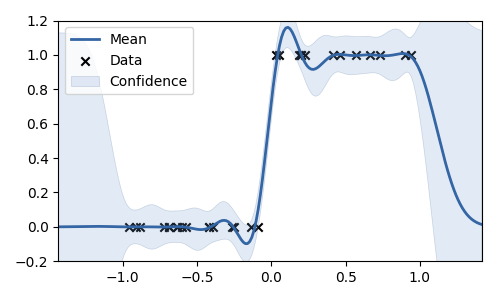

(-0.2, 1.2)

In [18]:
np.random.seed(42)
X = np.random.rand(30, 1) * 2 - 1
y = heaviside(X)

k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

m = GPy.models.GPRegression(X, y, k)
m.optimize()
print(m)
m.plot(figsize=(5, 3))
pyplot.ylim([-0.2, 1.2])

### Covariance functions in GPy

Popular covariance functions: `Exponential`, `Matern32`, `Matern52`, `RatQuad`, `Linear`, `StdPeriodic`. 

* Exponential:
$$
k(x, x') = \sigma^2 \exp \left (-\frac{r}{l} \right), \quad r = \|x - x'\|
$$

* Matern32
$$
k(x, x') = \sigma^2 \left (1 + \sqrt{3}\frac{r}{l} \right )\exp \left (-\sqrt{3}\frac{r}{l} \right )
$$

* Matern52
$$
k(x, x') = \sigma^2 \left (1 + \sqrt{5}\frac{r}{l} + \frac{5}{3}\frac{r^2}{l^2} \right ) \exp \left (-\sqrt{5}\frac{r}{l} \right )
$$

* RatQuad
$$
k(x, x') = \left ( 1 + \frac{r^2}{2\alpha l^2}\right )^{-\alpha}
$$

* Linear
$$
k(x, x') = \sum_i \sigma_i^2 x_i x_i'
$$

* Poly
$$
k(x, x') = \sigma^2 (x^T x' + c)^d
$$

* StdPeriodic
$$
k(x, x') = \sigma^2 \exp\left ( -2 \frac{\sin^2(\pi r)}{l^2}\right )
$$

<IPython.core.display.Javascript object>


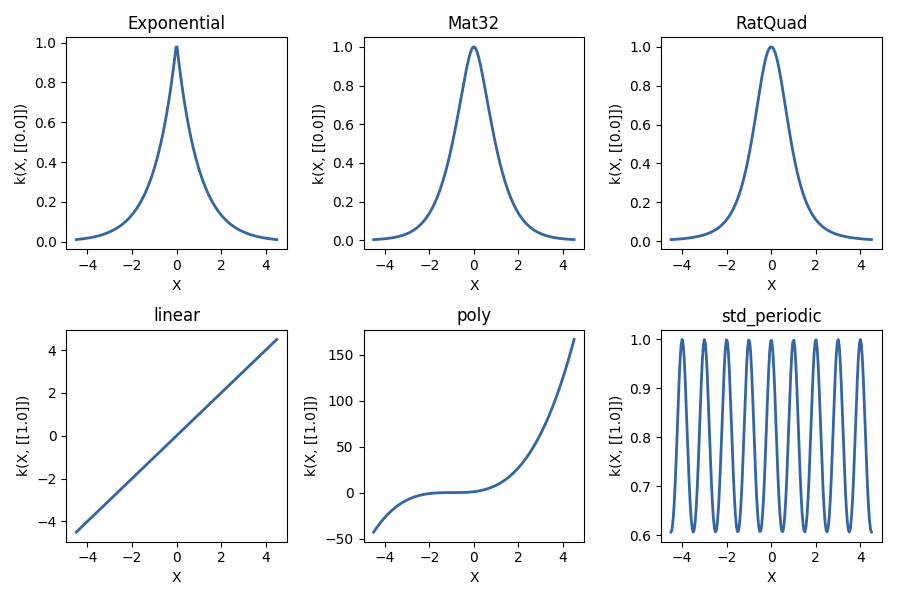

In [19]:
covariance_functions = [GPy.kern.Exponential(1), GPy.kern.Matern32(1),
                        GPy.kern.RatQuad(1), GPy.kern.Linear(1),
                        GPy.kern.Poly(1), GPy.kern.StdPeriodic(1)]
figure, axes = pyplot.subplots(2, 3, figsize=(9, 6))
axes = axes.ravel()
for i, k in enumerate(covariance_functions):
    k.plot(ax=axes[i])
    axes[i].set_title(k.name)
figure.tight_layout()

#### What covariance function we should use to obatin more accurate approximation of Heaviside function?

## Combination of covariance functions

* Sum of covariance function is a valid covariance function:

$$
k(x, x') = k_1(x, x') + k_2(x, x')
$$

* Product of covariance functions is a valid covariance funciton:
$$
k(x, x') = k_1(x, x') k_2(x, x')
$$

### Combinations of covariance functions in GPy

In GPy to combine covariance functions you can just use operators `+` and `*`.

For example, to define covariance function that is a sum of covariance functions we can do the following:

  sum.              |  value  |  constraints  |  priors
  linear.variances  |    1.0  |      +ve      |        
  rbf.variance      |    2.0  |      +ve      |        
  rbf.lengthscale   |    1.0  |      +ve      |        


<IPython.core.display.Javascript object>


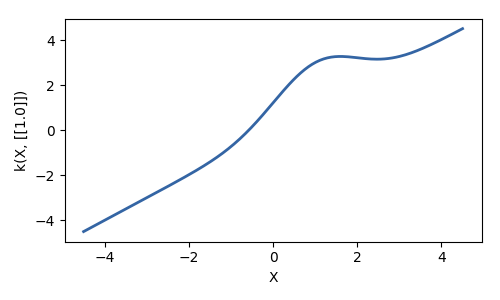

In [20]:
kern1 = GPy.kern.Linear(1)
kern2 = GPy.kern.RBF(1, variance=2., lengthscale=1)
kern = kern1 + kern2
print(kern)
kern.plot(figsize=(5, 3))

#### Linear times Periodic

  mul.                      |  value  |  constraints  |  priors
  linear.variances          |    1.0  |      +ve      |        
  std_periodic.variance     |    1.0  |      +ve      |        
  std_periodic.period       |    1.0  |      +ve      |        
  std_periodic.lengthscale  |    1.0  |      +ve      |        


<IPython.core.display.Javascript object>


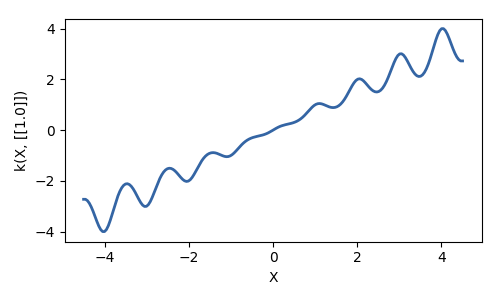

In [21]:
kern = GPy.kern.Linear(1) * GPy.kern.StdPeriodic(1)
print(kern)
kern.plot(figsize=(5, 3))

### Additive kernels

One of the popular approach to model the function of interest is
$$
f(x) = \sum_{i=1}^d f_i(x_i) + \sum_{i < j} f_{ij}(x_i, x_j) + \ldots
$$

**Example**: $\quad f(x_1, x_2) = f_1(x_1) + f_2(x_2)$  
To model it using GP use additive kernel $\quad k(x, y) = k_1(x_1, y_1) + k_2(x_2, y_2)$.

More general - add kernels each depending on subset of inputs
$$
k(x, y) = k_1(x, y) + \ldots + k_D(x, y),
$$
where, for example, $k_1(x, x') = k_1(x_1, x_1'), \; k_2(x, x') = k_2((x_1, x_3), (x_1', x_3'))$, etc.



<IPython.core.display.Javascript object>


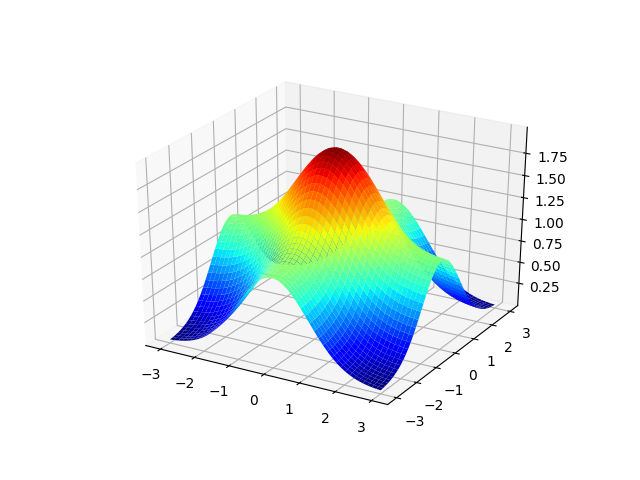

In [22]:
k1 = GPy.kern.RBF(1, active_dims=[0])
k2 = GPy.kern.RBF(1, active_dims=[1])

kernel = k1 + k2

x = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
x = np.hstack((x[0].reshape(-1, 1), x[1].reshape(-1, 1)))
z = kernel.K(x, np.array([[0, 0]]))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

figure = pyplot.figure()
ax = figure.add_subplot(111, projection='3d')
ax.plot_surface(x[:, 0].reshape(50, 50), x[:, 1].reshape(50, 50), z.reshape(50, 50), cmap=cm.jet)
pyplot.show()

### Kernels on arbitrary types of objects

Kernels can be defined over all types of data structures: text, images, matrices, graphs, etc. You just need to define similarity between objects.

#### Kernels on categorical data

* Represent your categorical variable as a by a one-of-k encoding: $\quad x = (x_1, \ldots, x_k)$.
* Use RBF kernel with `ARD=True`: $\quad k(x , x') = \sigma^2 \prod_{i = 1}^k\exp{\left ( -\dfrac{(x_i - x_i')^2}{\sigma_i^2} \right )}$. The lengthscale will now encode whether the rest of the function changes.
* Short lengthscales for categorical variables means your model is not sharing any information between data of different categories. 

## 2 Sampling from GP

GP defines distribution over functions, which is defined by its *mean function* $m(x)$ and *covariance function* $k(x, y)$: for any set $\mathbf{x}_1, \ldots, \mathbf{x}_N \in \mathbb{R}^d \rightarrow$ $\left (f(\mathbf{x}_1), \ldots, f(\mathbf{x}_N) \right ) \sim \mathcal{N}(\mathbf{m}, \mathbf{K})$,
where $\mathcal{m} = (m(\mathbf{x}_1, \ldots, \mathbf{x}_N)$, $\mathbf{K} = \|k(\mathbf{x}_i, \mathbf{x}_j)\|_{i,j=1}^N$.

Sampling procedure:

1. Generate set of points $\mathbf{x}_1, \ldots, \mathbf{x}_N$.
2. Calculate mean and covariance matrix $\mathcal{m} = (m(\mathbf{x}_1, \ldots, \mathbf{x}_N)$, $\mathbf{K} = \|k(\mathbf{x}_i, \mathbf{x}_j)\|_{i,j=1}^N$.
3. Generate vector from multivariate normal distribution $\mathcal{N}(\mathbf{m}, \mathbf{K})$.

<IPython.core.display.Javascript object>


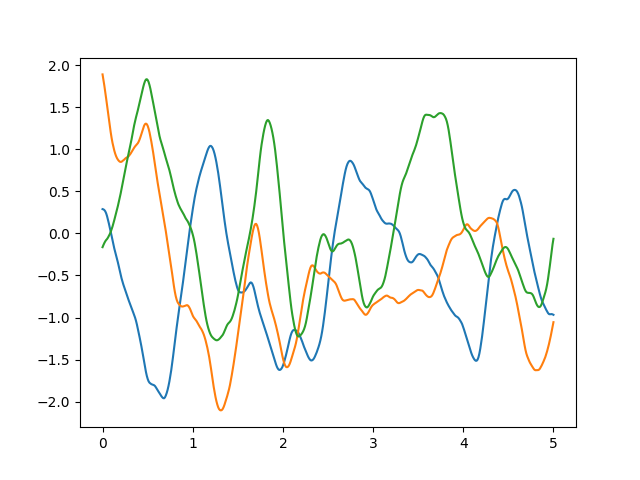

In [23]:
k = GPy.kern.Matern52(input_dim=1, lengthscale=0.3)

X = np.linspace(0, 5, 500).reshape(-1, 1)

mu = np.zeros(500)
C = k.K(X, X)

Z = np.random.multivariate_normal(mu, C, 3)

pyplot.figure()
for i in range(3):
    pyplot.plot(X, Z[i, :])

### Task

Build a GP model that predicts airline passenger counts on international flights.

<IPython.core.display.Javascript object>


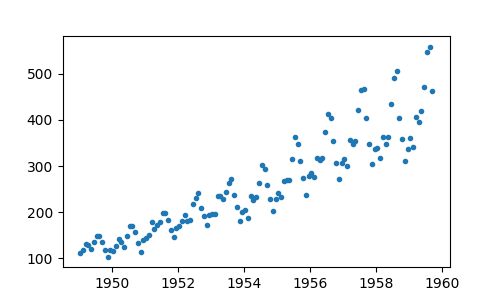

In [24]:
from scipy.io import loadmat

data = loadmat('airline.mat')

X = data['X']
y = data['y']

pyplot.figure(figsize=(5, 3))
pyplot.plot(X, y, '.')

You need to obtain something like this
<img src="airline_result.png">

In [25]:
def plot_model(X, y, kernel):
    model = GPy.models.GPRegression(X, y, kernel)
    model.optimize()
    print(model)
    
    x = np.linspace(1948, 1964, 400).reshape(-1, 1)
    prediction_mean, prediction_var = model.predict(x)
    prediction_std = np.sqrt(prediction_var).ravel()
    prediction_mean = prediction_mean.ravel()
    
    pyplot.figure(figsize=(5, 3))
    pyplot.plot(X, y, '.', label='Train data')
    pyplot.plot(x, prediction_mean, label='Prediction')
    pyplot.fill_between(x.ravel(), prediction_mean - prediction_std, prediction_mean + prediction_std, alpha=0.3)

#### Let's try RBF kernel


Name : GP regression
Objective : 670.4420282316476
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |    253853.5498  |      +ve      |        
  rbf.lengthscale          |  16.5880694064  |      +ve      |        
  Gaussian_noise.variance  |  1654.43530623  |      +ve      |        


 /home/yermek/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


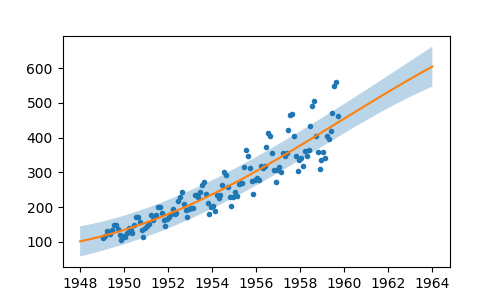

In [26]:
k_rbf = GPy.kern.RBF(1)
plot_model(X, y, k_rbf)

We will try to model this data set using 3 additive components: trend, seasonality and noise.  
So, the kernel should be a sum of 3 kernels:  
`kernel = kernel_trend + kernel_seasonality + kernel_noise`

#### Let's first try to model trend


Name : GP regression
Objective : 670.3925421867847
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  sum.poly.variance        |  8.92491673747e-05  |      +ve      |        
  sum.poly.scale           |      261.011543311  |      +ve      |        
  sum.poly.bias            |      456.934354414  |      +ve      |        
  sum.rbf.variance         |      185432.560016  |      +ve      |        
  sum.rbf.lengthscale      |      15.7413440987  |      +ve      |        
  Gaussian_noise.variance  |      1654.53452733  |      +ve      |        


 /home/yermek/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


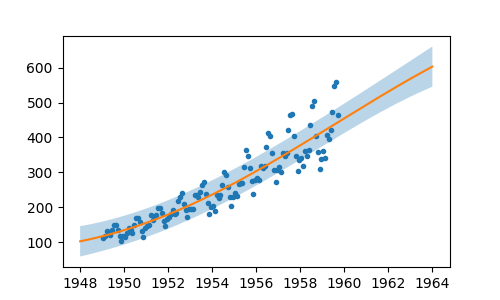

In [27]:
k_trend = GPy.kern.Poly(1, order=1) + GPy.kern.RBF(1)
plot_model(X, y, k_trend)

#### Let's model periodicity


Name : GP regression
Objective : 634.1200219113683
Number of Parameters : 12
Number of Optimization Parameters : 12
Updates : True
Parameters:
  GP_regression.                    |           value  |  constraints  |  priors
  sum.poly.variance                 |  0.133150687205  |      +ve      |        
  sum.poly.scale                    |  0.133150749337  |      +ve      |        
  sum.poly.bias                     |  0.999999696558  |      +ve      |        
  sum.rbf.variance                  |   1.01081700714  |      +ve      |        
  sum.rbf.lengthscale               |   1.01140549581  |      +ve      |        
  sum.mul.std_periodic.variance     |  0.124420406321  |      +ve      |        
  sum.mul.std_periodic.period       |  0.604363370266  |      +ve      |        
  sum.mul.std_periodic.lengthscale  |  0.762043769028  |      +ve      |        
  sum.mul.linear.variances          |  0.124420406321  |      +ve      |        
  sum.mul.rbf.variance              |  0.12442

 /home/yermek/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


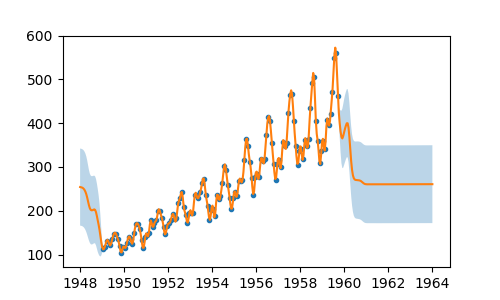

In [28]:
k_trend = GPy.kern.Poly(1, order=1) + GPy.kern.RBF(1)
k_seasonal = GPy.kern.StdPeriodic(1) * GPy.kern.Linear(1) * GPy.kern.RBF(1)
kernel = k_trend + k_seasonal
plot_model(X, y, kernel)

#### Let's add noise model


Name : GP regression
Objective : 503.14031451729653
Number of Parameters : 14
Number of Optimization Parameters : 14
Updates : True
Parameters:
  GP_regression.                    |              value  |  constraints  |  priors
  sum.poly.variance                 |  2.33418668455e-06  |      +ve      |        
  sum.poly.scale                    |  2.33419812416e-06  |      +ve      |        
  sum.poly.bias                     |     0.999997366232  |      +ve      |        
  sum.rbf.variance                  |      100.007538594  |      +ve      |        
  sum.rbf.lengthscale               |     0.553515269139  |      +ve      |        
  sum.mul.std_periodic.variance     |     0.252758480776  |      +ve      |        
  sum.mul.std_periodic.period       |      1.00267574499  |      +ve      |        
  sum.mul.std_periodic.lengthscale  |     0.532235580774  |      +ve      |        
  sum.mul.linear.variances          |     0.252758477255  |      +ve      |        
  sum.mul.rbf.v

 /home/yermek/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


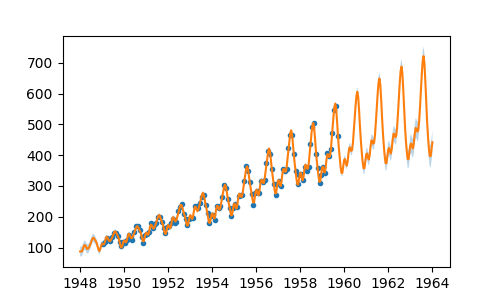

In [30]:
k_trend = GPy.kern.Poly(1, order=1) + GPy.kern.RBF(1)
k_periodicity = GPy.kern.StdPeriodic(1) * GPy.kern.Linear(1) * GPy.kern.RBF(1)
k_noise = GPy.kern.White(1) * GPy.kern.Linear(1)
kernel = k_trend + k_periodicity + k_noise

plot_model(X, y, kernel)